In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [42]:
# Import dataset, set null values to np.nan
na_vals = [' ', '']
df = pd.read_csv('project_data.csv', sep=';', na_values=na_vals, decimal=',')

----------------------
1. PREPROCESSING DATA
----------------------

1.1 Cleaning data

In [43]:
# Let's choose only the necessary variables
chosen_vars = ['fixedacidity', 'volatileacidity', 'citricacid', 'residualsugar', 'alcohol', 'pH', 'sulphates', 'quality']
df = df[chosen_vars]

In [44]:
# Let's check if there are any missing variables in the dataset
print(df.isnull().sum().sum()) # There are total of 4 missing values in the data set.
df.dropna(inplace=True) # Let's remove the rows with null values

4


In [45]:
# At this point let's split the dataset to predictors (X) and target value (y)
X_raw = df.drop(columns='quality')
y = df['quality'];

1.2 Min-Max-Normalization

In [46]:
# Normalization
from sklearn.preprocessing import MinMaxScaler

# Min-max-normalization
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X_raw), columns=X_raw.columns, index=X_raw.index)

C:\Users\Omistaja\anaconda3\envs\da3115\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Omistaja\anaconda3\envs\da3115\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Omistaja\anaconda3\envs\da3115\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Omistaja\anaconda3\envs\da3115\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future ver

1.3 Linear regression assumptions

In [47]:
# Let's create a linear regression model
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
X = add_constant(X)
model = sm.OLS(y, X).fit()

1.3.1 Independence of observations

In [48]:
# Let's check the independence of observations (autocorrelation) with Durbin-Watson test
from statsmodels.tools.tools import add_constant
from statsmodels.stats.stattools import durbin_watson
model_residuals = model.resid    #statsmodels-library
durbin_watson(model_residuals)   #statsmodels-library

1.6963262988981855

1.3.2 Linearity, Homoscedasticity

Text(0, 0.5, 'Quality score')

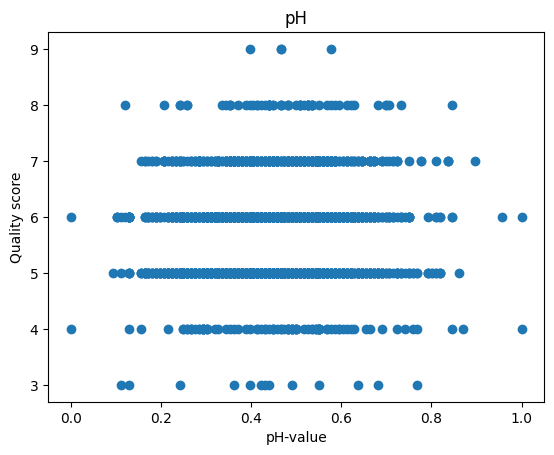

In [49]:
# Let's plot the pH-scatter diagram
plt.scatter(X['pH'], y)
plt.title('pH')
plt.xlabel('pH-value')
plt.ylabel('Quality score')

1.3.3 Normality

In [50]:
# Check the data skewness and kurtosis 
from scipy.stats import skew, kurtosis

skewness_kurtosis = pd.DataFrame()
skewness_kurtosis['variable'] = X.columns
skewness_kurtosis['skewness'] = skew(X)
skewness_kurtosis['kurtosis'] = kurtosis(X)
skewness_kurtosis.drop(0)

C:\Users\Omistaja\AppData\Local\Temp\ipykernel_12184\757111255.py:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness_kurtosis['skewness'] = skew(X)
C:\Users\Omistaja\AppData\Local\Temp\ipykernel_12184\757111255.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness_kurtosis['kurtosis'] = kurtosis(X)


,variable,skewness,kurtosis
1,fixedacidity,1.334123,2.287781
2,volatileacidity,1.007204,0.984792
3,citricacid,0.254817,1.528558
4,residualsugar,1.700013,2.022206
5,alcohol,0.819306,0.010344
6,pH,0.195318,0.091908
7,sulphates,1.980630,9.730896


In [51]:
# Log-transformation of sulphates-variable
X['sulphates'] = X['sulphates'].apply(lambda x: np.log1p(x))

# Check the data skewness and kurtosis after log-transformation
skewness_kurtosis['skewness'] = skew(X)
skewness_kurtosis['kurtosis'] = kurtosis(X)
skewness_kurtosis.drop(0)

C:\Users\Omistaja\AppData\Local\Temp\ipykernel_12184\1433017836.py:5: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness_kurtosis['skewness'] = skew(X)
C:\Users\Omistaja\AppData\Local\Temp\ipykernel_12184\1433017836.py:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness_kurtosis['kurtosis'] = kurtosis(X)


,variable,skewness,kurtosis
1,fixedacidity,1.334123,2.287781
2,volatileacidity,1.007204,0.984792
3,citricacid,0.254817,1.528558
4,residualsugar,1.700013,2.022206
5,alcohol,0.819306,0.010344
6,pH,0.195318,0.091908
7,sulphates,1.298156,4.539253


In [52]:
# As sulphates kurtosis-value is still too big, lets remove the variable
X = X.drop(columns='sulphates')

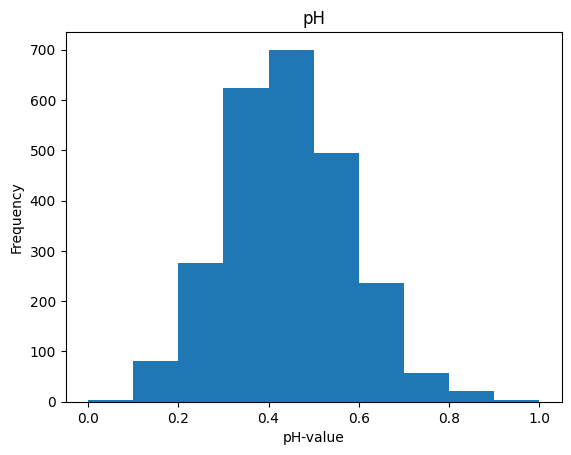

In [53]:
# Let's plot the pH
plt.hist(X['pH'])
plt.title('pH')
plt.xlabel('pH-value')
plt.ylabel('Frequency')
plt.show()

1.3.4 Multicollinearity

In [54]:
# Check the multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF = pd.DataFrame()
VIF['variable'] = X.columns
vifs = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]    #statsmodels-library
VIF['VIF'] = vifs
VIF.drop(0)    # exclude const-column

,variable,VIF
1,fixedacidity,1.792430
2,volatileacidity,1.632693
3,citricacid,2.014781
4,residualsugar,1.374487
5,alcohol,1.210682
6,pH,1.516469


---------
2. ANALYSIS
----------

2.1 Correlation Matrix

<Axes: >

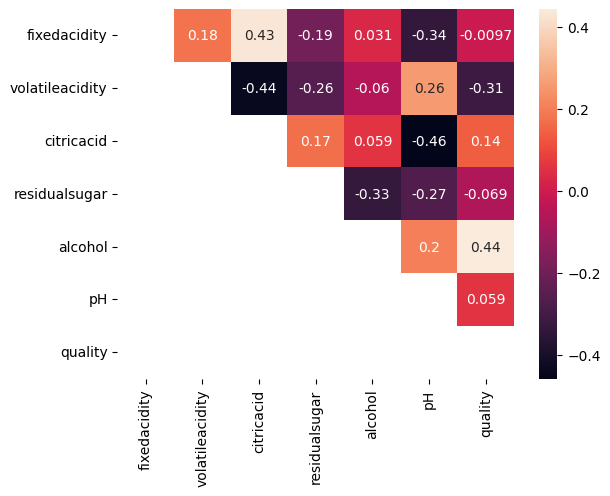

In [55]:
# Correlation matrix
import seaborn as sn
Xy = X.drop(columns='const')
Xy['quality'] = y
corr_matrix = Xy.corr()
sn.heatmap(corr_matrix, annot=True, mask=np.tril(corr_matrix))

2.2 Stepwise regression: Feature selection

In [56]:
model = sm.OLS(y, X).fit()    #statsmodels-library
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     166.1
Date:                Thu, 07 Dec 2023   Prob (F-statistic):          6.42e-178
Time:                        20:06:39   Log-Likelihood:                -2812.5
No. Observations:                2495   AIC:                             5639.
Df Residuals:                    2488   BIC:                             5680.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.2919      0.097     54.615      0.000       5.102       5.482
fixedacidity        0.5268      0.140      3.763      0.000       0.252       0.801
volatileacidity    -1.9797      0.128    -15.408      0.000      -2.232      -1.728
citricacid         -0.3150      0.212     -1.488      0.137      -0.730       0.100
residualsugar       0.1337      0.090      1.483      0.138      -0.043       0.310
alcohol             2.1787      0.098     22.309      0.000       1.987       2.370
pH                  0.5285      0.134      3.944      0.000       0.266       0.791
==============================================================================
Omnibus:                       72.336   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.898
Skew:                          -0.148   Prob(JB):                     8.51e-35
Kurtosis:                       4.192   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Remove the residualsugar
X = X.drop(columns='residualsugar')
model = sm.OLS(y, X).fit()    #statsmodels-library
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     198.8
Date:                Thu, 07 Dec 2023   Prob (F-statistic):          1.29e-178
Time:                        20:06:39   Log-Likelihood:                -2813.6
No. Observations:                2495   AIC:                             5639.
Df Residuals:                    2489   BIC:                             5674.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.3558      0.087     61.701      0.000       5.186       5.526
fixedacidity        0.4677      0.134      3.485      0.001       0.205       0.731
volatileacidity    -1.9931      0.128    -15.546      0.000      -2.244      -1.742
citricacid         -0.2635      0.209     -1.262      0.207      -0.673       0.146
alcohol             2.1326      0.093     23.034      0.000       1.951       2.314
pH                  0.4891      0.131      3.723      0.000       0.231       0.747
==============================================================================
Omnibus:                       70.653   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.215
Skew:                          -0.141   Prob(JB):                     5.37e-34
Kurtosis:                       4.181   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# Remove the citricacid
X = X.drop(columns='citricacid')
model = sm.OLS(y, X).fit()    #statsmodels-library
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     248.0
Date:                Thu, 07 Dec 2023   Prob (F-statistic):          1.70e-179
Time:                        20:06:39   Log-Likelihood:                -2814.4
No. Observations:                2495   AIC:                             5639.
Df Residuals:                    2490   BIC:                             5668.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.2927      0.071     74.529      0.000       5.153       5.432
fixedacidity        0.3859      0.118      3.283      0.001       0.155       0.616
volatileacidity    -1.9106      0.110    -17.321      0.000      -2.127      -1.694
alcohol             2.1236      0.092     23.002      0.000       1.943       2.305
pH                  0.5275      0.128      4.128      0.000       0.277       0.778
==============================================================================
Omnibus:                       70.801   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.860
Skew:                          -0.144   Prob(JB):                     6.41e-34
Kurtosis:                       4.178   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
#from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_1 = sm.OLS(y_train, X_train).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     195.8
Date:                Thu, 07 Dec 2023   Prob (F-statistic):          1.03e-141
Time:                        20:06:39   Log-Likelihood:                -2260.9
No. Observations:                1996   AIC:                             4532.
Df Residuals:                    1991   BIC:                             4560.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.3057      0.080     66.155      0.000       5.148       5.463
fixedacidity        0.3403      0.135      2.526      0.012       0.076       0.605
volatileacidity    -1.8514      0.124    -14.922      0.000      -2.095      -1.608
alcohol             2.1619      0.104     20.850      0.000       1.959       2.365
pH                  0.4798      0.143      3.353      0.001       0.199       0.760
==============================================================================
Omnibus:                       48.386   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.878
Skew:                          -0.090   Prob(JB):                     4.57e-23
Kurtosis:                       4.098   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
model_2 = sm.OLS(y_test, X_test).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     52.14
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           1.23e-36
Time:                        20:06:39   Log-Likelihood:                -552.10
No. Observations:                 499   AIC:                             1114.
Df Residuals:                     494   BIC:                             1135.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.2342      0.154     34.045      0.000       4.932       5.536
fixedacidity        0.5682      0.242      2.349      0.019       0.093       1.043
volatileacidity    -2.1395      0.244     -8.783      0.000      -2.618      -1.661
alcohol             1.9623      0.204      9.626      0.000       1.562       2.363
pH                  0.7396      0.286      2.588      0.010       0.178       1.301
==============================================================================
Omnibus:                       29.413   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.422
Skew:                          -0.371   Prob(JB):                     9.23e-13
Kurtosis:                       4.455   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""